In [144]:
import numpy as np 
import pandas as pd
from matplotlib import cm as cm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df=pd.read_csv("final.csv")
dataset=df[df.STATE=='BIHAR']
AT=dataset['AvgTemp']
Prep=dataset['Precipitation']
PE=dataset['PotentialEvapTran']
VP=dataset['VapourPres']
WDf=dataset['WetDayFreq']

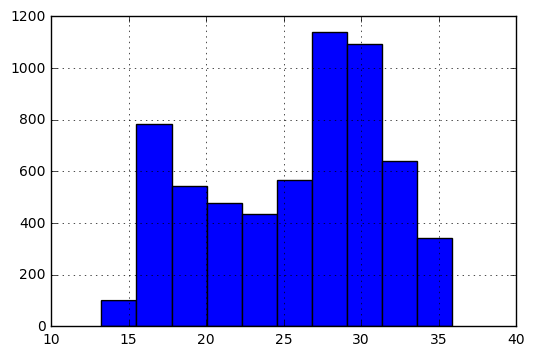

In [111]:
AT.hist()
plt.show()

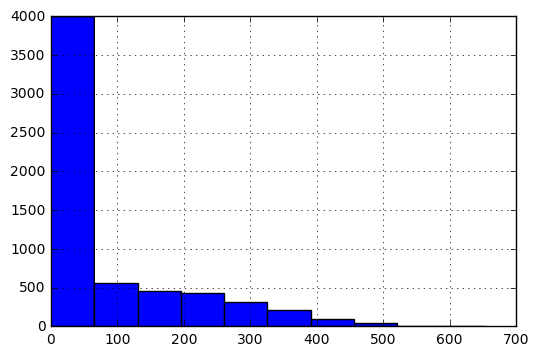

In [112]:
Prep.hist()
plt.show()

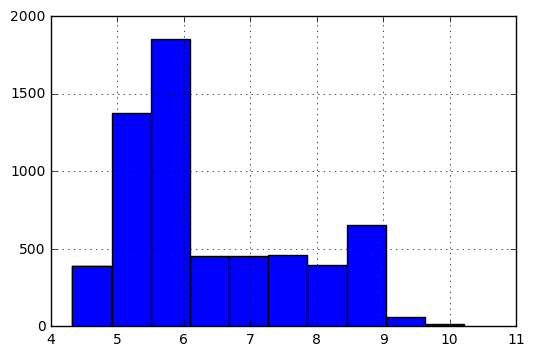

In [113]:
PE.hist()
plt.show()

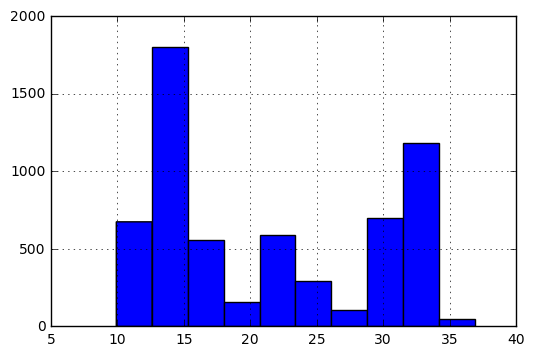

In [114]:
VP.hist()
plt.show()

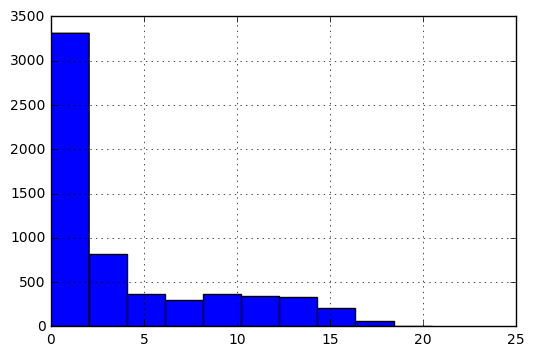

In [115]:
WDf.hist()
plt.show()

In [129]:
corr=dataset.corr(method='pearson')
print(corr)

                    AvgTemp      YEAR  PotentialEvapTran  Precipitation  \
AvgTemp            1.000000  0.006732           0.692068       0.382459   
YEAR               0.006732  1.000000          -0.019727      -0.054326   
PotentialEvapTran  0.692068 -0.019727           1.000000      -0.233869   
Precipitation      0.382459 -0.054326          -0.233869       1.000000   
SPI               -0.048292 -0.232890          -0.038762       0.195172   
VapourPres         0.679664  0.009032          -0.016114       0.789135   
WetDayFreq         0.412237 -0.022496          -0.233649       0.956133   
CLASS              0.032043  0.130317           0.018253      -0.087195   

                        SPI  VapourPres  WetDayFreq     CLASS  
AvgTemp           -0.048292    0.679664    0.412237  0.032043  
YEAR              -0.232890    0.009032   -0.022496  0.130317  
PotentialEvapTran -0.038762   -0.016114   -0.233649  0.018253  
Precipitation      0.195172    0.789135    0.956133 -0.087195  
SPI 

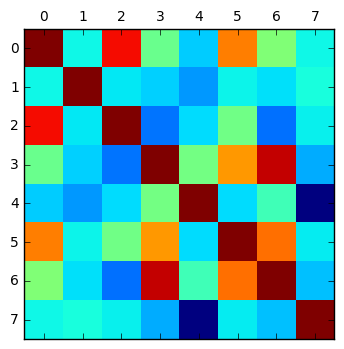

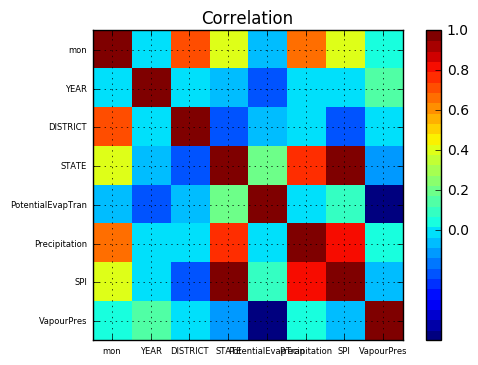

In [153]:
plt.matshow(df.corr())
plt.show()
"""names=['AvgTemp', 'mon', 'YEAR', 'DISTRICT', 'STATE', 'PotentialEvapTran',
       'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq', 'CLASS']
fig=plt.figure()
ax=fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
"""
def correlation_matrix(df):
    
    

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation')
    labels=['AvgTemp', 'mon', 'YEAR', 'DISTRICT', 'STATE', 'PotentialEvapTran',
       'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq', 'CLASS']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.0,.2,.4,.6,.8,1])
    plt.show()

correlation_matrix(dataset)

In [116]:

X=dataset.iloc[:,[0,1,3,4,5,6,8,9]].values
Y=dataset.iloc[:,10].values
labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])

In [117]:
X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

In [118]:
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
acc=classifier.score(X_test,y_test)
print(classifier.score(X_test,y_test))

0.930555555556


In [119]:
#excluding now avg temp 
X=dataset.iloc[:,[1,3,4,5,6,8,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.930555555556
0.929738562092
-0.0877963125549


In [120]:
#excluding PE
X=dataset.iloc[:,[0,1,3,4,6,8,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.930555555556
0.925653594771
-0.526777875329


In [121]:
#excluding Precipitation
X=dataset.iloc[:,[0,1,3,4,5,8,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.930555555556
0.919117647059
-1.22914837577


In [122]:
#excluding VP
X=dataset.iloc[:,[0,1,3,4,5,6,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.930555555556
0.93137254902
0.0877963125549


In [123]:
#excluding WD
X=dataset.iloc[:,[0,1,3,4,5,6,8]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.930555555556
0.925653594771
-0.526777875329


In [124]:
#single featured: avg temp
X=dataset.iloc[:,[0]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.930555555556
0.891339869281
-4.21422300263


In [125]:
#single featured: PE
X=dataset.iloc[:,[5]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.930555555556
0.934640522876
0.438981562774


In [126]:
#single featured: Precipitation
X=dataset.iloc[:,[6]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.930555555556
0.876633986928
-5.79455662862


In [127]:
#single featured: VP
X=dataset.iloc[:,[8]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.930555555556
0.910947712418
-2.10711150132


In [128]:
#single featured: WDF
X=dataset.iloc[:,[9]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()


X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)



0.930555555556
0.911764705882
-2.01931518876


In [135]:
columns=dataset.columns
print(columns)

Index(['AvgTemp', 'mon', 'YEAR', 'DISTRICT', 'STATE', 'PotentialEvapTran',
       'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq', 'CLASS'],
      dtype='object')
